# 概述

## 思想
感知机试图找到一个超平面，能够把所有的二元类别分开。

## 数学描述感知机
如果我们有m个样品，每个样品对应n个特征，和一个二元类别输出，如下  
$(x_1^{(1)},x_2^{(1)},\cdots,x_n^{(1)},y_1),(x_1^{(2)},x_2^{(2)},\cdots,x_n^{(2)},y_2),\cdots,(x_1^{(m)},x_2^{(m)},\cdots,x_n^{(m)},y_m)$  
我们的目的是找到这么一个超平面，即  
$\theta_0+\theta_1x_1+\cdots+\theta_nx_n=0$  
做到如下
- 一个类别的样品都满足 >0 
- 一个列别的样品都满足 <0

如果数据线性可分，这样的超平面不是唯一的。  
为了简化写法，我们增加一个特征 $x_0=1$,这样超平面就是 $\sum\limits_{i=0}^{n}\theta_i x_i = 0$ 用向量表示就是 $\theta\cdot x = 0$ ，感知机的模型就如下：  
$y = sign(\theta\cdot x)=\left\{\begin{align}&-1&x<0\\&1&x\ge 0\end{align}\right.$  
## 感知机的损失函数
- 取值
   - 将取值 $\theta\cdot x > 0$ 的样本类别的输出值为1
   - 将取值 $\theta\cdot x < 0$ 的样本类别的输出值为-1
- 损失函数
   - 正确分类的样品，$y \theta\cdot x > 0$
   - 错误分类的样品，$y \theta\cdot x < 0$
- 损失函数的目标
   - 误分类的所有样品，到超平面的距离之和最小。
- 构造损失函数
   - 对于每一个误分类的样本i，到超平面的距离为  $-\frac{y^{(i)}\theta\cdot x^{(i)}}{||\theta||_2}$
   - 假设误分类的集合为M，则所有误分类的样品到超平面的距离之和为 $ -\sum\limits_{x_i\in M}\frac{y^{(i)}\theta\cdot x^{(i)}}{||\theta||_2}$
- 精简
   - 分子和分母都含有 $\theta$,存在倍数关系，然后我们可以假定分子或者分母为1，然后求分子自己或者分母的导数的最小化作为损失函数。
      - 在感知机模型种，我们采取的是保留分子，精简化的感知机模型的损失函数如下
         - $J(\theta)=-\sum\limits_{x_i\in M}y^{(i)}\theta\cdot x^{(i)}$
- 计算损失函数
   - 用梯度下降法，但只有误分类的M集合样品才能参与损失函数的优化。
      - 损失函数基于$\theta $的偏导数为
         - $\frac{\partial}{\partial\theta}J(\theta)=-\sum\limits_{x_i\in M} y^{(i)}x^{(i)}$
      - 梯度下降迭代公式为
         - $\theta=\theta+\alpha\sum\limits_{x_i\in M} y^{(i)}x^{(i)}$
      - 我们采用的是随机梯度下降，假设采用第i个样本来更新梯度
         - $\theta=\theta+\alpha y^{(i)}x^{(i)}$

# 感知机算法的对偶形式
 
$\theta =\alpha \sum\limits_{j=1}^{m}m_{j}y^{(j)}x^{(j)}$  
$m_j$是样品$(x^{(j)},y^{(j)})$在梯度下降到当前的这一步因误分类而更次年的次数。  
由于$\alpha$是常量，我们令 $\beta_j=\alpha m_j$，这样表达式如下：  
$\theta = \sum\limits_{j=1}^{m}\beta_j y^{(i)}x^{(i)}$  
判断误分类的，就是如下的形式了  
$y^{(i)}\sum\limits_{j=1}^{m}\beta_j y^{(j)}x^{(j)}\bullet x^{(i)} < 0$

# 计算步骤
1. 初始化数据
   - $x_0=1$
   - 设置步长 $\alpha=1$
   - $\beta=0$
2. 计算内积形成的Gram形成的矩阵，为了以后方便运算而已，毕竟少很多运算。
3. 选择一个误分类点 $(x^{(i)},y^{(i)})$
   - 满足条件 $y^{(i)}\sum\limits_{j=1}^{m}\beta_j y^{(j)}x^{(j)}\bullet x^{(i)} <= 0$
4. 用梯度下降法对 $\beta$的第i个向量进行一次更新。
5. 检查是否还有其他的误分类点，
   - 如果有，继续步骤4
   - 如果没有，结果为  $\theta=\sum\limits_{j=1}^{m}\beta_{j}y^{(j)}x^{(j)}$

# python代码

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

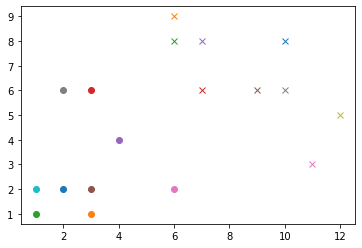

In [28]:
# 我们先设置几个数据吧
x=np.array([[1,2],[2,2],[3,1],[10,8],[6,9],[1,1],[3,6],[4,4],[6,8],[7,6],[3,2],[7,8],[6,2],[9,6],[11,3],[10,6],[12,5],[2,6]])
y=np.array([-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1,-1,1,1,1,1,-1])
y=y.reshape(len(y),1)
y_g_0=np.where(y>0)
for i in x[(np.where(y>0))[0]]:
    plt.plot(i[0],i[1],'x')
for i in x[(np.where(y<0))[0]]:
    plt.plot(i[0],i[1],'o') 

In [29]:
# 初始化数据，添加x0
x=np.insert(x,0,values=1,axis=1)
alpha=1

In [30]:
# 这里先用原始算法
def f1():
    theta=np.zeros((len(x[0]),1))
    y_tmp=x.dot(theta)*y
    error_index=np.where(y_tmp<=0)
    while(len(error_index[0])>0):
        theta=theta+alpha*np.sum(y[error_index[0]]*x[error_index[0]],axis=0).reshape(3,1)
        print(theta.T)
        y_tmp=x.dot(theta)*y
        error_index=np.where(y_tmp<=0)
%time  f1() 

[[ 0. 53. 33.]]
[[-9. 28.  7.]]
[[-18.   3. -19.]]
[[-9. 81. 40.]]
[[-18.  56.  14.]]
[[-27.  31. -12.]]
[[-32.  13. -23.]]
[[-26.  62.  26.]]
[[-35.  37.   0.]]
[[-44.  12. -26.]]
[[-36.  79.  30.]]
[[-45.  54.   4.]]
[[-54.  29. -22.]]
[[-53.  39.   0.]]
[[-60.  16. -23.]]
[[-53.  71.  28.]]
[[-62.  46.   2.]]
[[-69.  23. -21.]]
[[-65.  53.  16.]]
[[-74.  28. -10.]]
[[-76.  19. -13.]]
[[-73.  39.  16.]]
[[-80.  16.  -7.]]
[[-77.  36.  22.]]
[[-85.  12.  -3.]]
[[-81.  38.  28.]]
[[-89.  14.   3.]]
[[-90.   8.   1.]]
[[-83.  63.  52.]]
[[-92.  38.  26.]]
[[-99.  15.   3.]]
Wall time: 40 ms


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


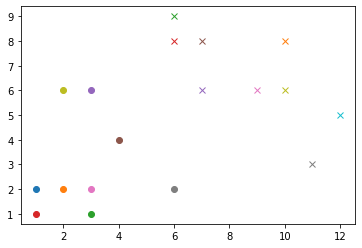

In [32]:
# 验证一下
x1=np.arange(x[:,1].min(),x[:,1].max(),0.1)
y1=-(theta[0][0]+theta[1][0]*x1)/theta[2][0]
plt.plot(x1,y1)
for i in x[(np.where(y>0))[0]]:
    plt.plot(i[1],i[2],'x')
for i in x[(np.where(y<0))[0]]:
    plt.plot(i[1],i[2],'o') 

In [33]:
# 算法2
# 因为测试运行时间，所以前面的都加到这里去了。
def f2():
    i=0
    theta=np.zeros((1,len(x[0])))[0] 
    alpha=1
    #y=y.reshape(1,len(y))[0]
    y=y=np.array([-1,-1,-1,1,1,-1,-1,-1,1,1,-1,1,-1,1,1,1,1,-1])
    # 迭代每个元素
    while i < len(x):
        #判断是否需要更次参数
        # 判断条件是
        if(y[i]*(theta*x[i]).sum()<=0):
            theta=theta+alpha*y[i]*x[i]
            i=0 # 重新开始啦
            print(theta)
        else:
            i=i+1    
%time f2()

[-1. -1. -2.]
[0. 9. 6.]
[-1.  8.  4.]
[-2.  7.  2.]
[-3.  6.  0.]
[-4.  5. -2.]
[-5.  3. -4.]
[-6.  0. -5.]
[-5. 10.  3.]
[-6.  9.  1.]
[-7.  8. -1.]
[-8.  6. -3.]
[-9.  3. -4.]
[-8. 13.  4.]
[-9. 12.  2.]
[-10.  11.   0.]
[-11.  10.  -2.]
[-12.   8.  -4.]
[-13.   5.  -5.]
[-12.  15.   3.]
[-13.  14.   1.]
[-14.  13.  -1.]
[-15.  11.  -3.]
[-16.   9.  -5.]
[-17.   6.  -6.]
[-16.  16.   2.]
[-17.  15.   0.]
[-18.  13.  -2.]
[-19.  11.  -4.]
[-20.   8.  -5.]
[-19.  14.   4.]
[-20.  13.   2.]
[-21.  11.   0.]
[-22.   9.  -2.]
[-23.   6.  -3.]
[-22.  12.   6.]
[-23.  11.   4.]
[-24.   9.   2.]
[-25.   6.   1.]
[-26.   2.  -3.]
[-25.  12.   5.]
[-26.  10.   3.]
[-27.   8.   1.]
[-28.   5.  -5.]
[-27.  15.   3.]
[-28.  13.   1.]
[-29.  11.  -1.]
[-30.   8.  -2.]
[-29.  14.   7.]
[-30.  12.   5.]
[-31.  10.   3.]
[-32.   7.   2.]
[-33.   4.  -4.]
[-32.  14.   4.]
[-33.  12.   2.]
[-34.   9.   1.]
[-35.   5.  -3.]
[-34.  15.   5.]
[-35.  13.   3.]
[-36.  10.   2.]
[-37.   7.  -4.]
[-36.  13. 

In [37]:
# 算法3 ，对偶的
a=1 # 步长为1
beta=np.linspace(0,0,len(x))
# 构造这个矩阵。
Gram=np.zeros((len(x),len(x)))
for i in range(len(x)):
    for j in range(len(x)):
        Gram[i][j]=(x[i]*x[j]).sum()
def check(k):
    # 检查第k项是否是误分类的点的
    _tmp=0
    # 对所有的样本
    for m in range(len(x)):
        _tmp=_tmp+beta[m]*y[m]*Gram[m][k]
        pass
    _tmp=y[k]*_tmp
    #判断是否小于等于0
    if _tmp<=0:
        return True
    return False
    pass
def f3():
    i=0
    # 迭代每个元素
    while i < len(x):
        #判断是否需要更次参数
        # 判断条件是
        if check(i):
            beta[i]=beta[i]+a
            i=0 # 重新开始啦
            # print(beta)
        else:
            i=i+1 
%time f3()

Wall time: 79.9 ms
